# Cell data exploration

In [1]:
import sys 
sys.path.append('..')

from lib.tab_exploration.tab_explorer import TabExplorer
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np
import json

np.random.seed(1)
%matplotlib inline

Read in cell embeddings and their labels.

In [2]:
df = pd.read_csv('../data/aml-1000-data.csv').astype(np.float32)
labels = json.loads(open('../data/aml-1000-labels.json').read())

Check some basic aggregate statistics.

In [3]:
df.head()

,latent_0,latent_1,latent_2,latent_3,latent_4,latent_5,latent_6,latent_7,latent_8,latent_9
0,1.516632,0.903259,-0.097086,-2.044586,-0.247638,1.387340,-0.211855,-1.221446,-0.061739,-0.934157
1,-1.215956,-0.860290,0.021960,1.408485,-1.201542,-1.136125,0.449842,-0.177732,0.188330,1.135100
2,1.765355,0.847469,-0.224583,-1.509742,1.182410,-0.184509,0.039695,1.108817,1.638987,-0.166383
3,1.818835,0.949116,-0.358533,-1.669337,0.986634,-0.407717,0.134607,0.464293,1.451976,-0.423699
4,-0.061928,0.767856,-0.023754,-0.840279,1.797838,1.052526,-1.055755,2.107646,0.601770,-0.122233


In [4]:
df.describe()

,latent_0,latent_1,latent_2,latent_3,latent_4,latent_5,latent_6,latent_7,latent_8,latent_9
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.072502,0.031253,0.239002,-0.073151,-0.158463,-0.095075,0.068826,0.097670,0.045358,0.020328
std,0.951256,0.777463,0.920055,1.135921,1.337420,1.282542,0.884244,1.144496,0.699646,0.595931
min,-1.372977,-1.389685,-1.579813,-2.493553,-1.826451,-1.939820,-1.777987,-2.440641,-1.105708,-1.241285
25%,-0.898598,-0.579418,-0.360631,-1.159394,-1.474637,-1.479641,-0.829777,-0.548378,-0.629176,-0.307708
50%,-0.259504,-0.341167,-0.012777,0.459736,-0.468647,-0.092358,0.184650,-0.336351,0.137587,-0.074882
75%,0.745926,0.870196,1.321648,0.822752,1.262043,1.195053,0.995449,1.188098,0.512651,0.207641
max,1.997190,1.257057,1.955671,1.733058,2.126890,1.988665,1.377415,2.507329,1.759778,1.376291


Generate dict mapping from label ids to their descriptions, as well as dataframe with labels ids as columns and cells as rows (input df to our visualisation).

In [5]:
labels_dict = {}
cell_labels = []

for lbs in labels:
    cell_dict = {}
    
    for label, value in lbs:
        label_split = label.split(':')
        key = ''.join(label_split[:2])
        labels_dict[key] = label_split[-1].strip()
        cell_dict[key] = value
        
    cell_labels.append(cell_dict)

df_labels = pd.DataFrame(cell_labels).astype(np.float32).fillna(0)

t-SNE embedding and DBSCAN clustering on top of it (inputs to our visualisation). 

In [6]:
tsne = TSNE(perplexity=30, early_exaggeration=12)
X_em = tsne.fit_transform(df)

dbscan = DBSCAN(eps=2.5)
clusters = dbscan.fit_predict(X_em)

Run static part of our visualisation. Use one tailed tests since we're only interested in over-representation. Since all of our attributes are continuous we prefer two sample tests. Look in TabExplorer's constructor docstring or BaseExplorer's plot_static docstring for other options.

(<Figure size 864x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f90e0f845f8>)

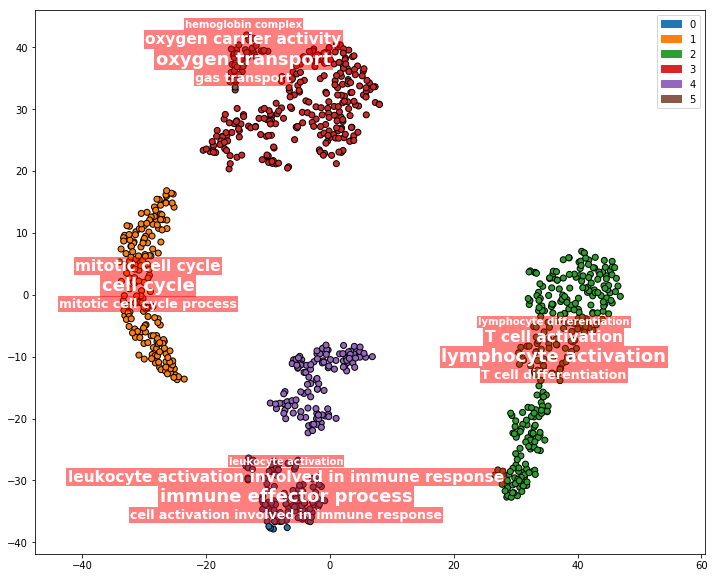

In [7]:
tab_explorer = TabExplorer(p_threshold = 0.01, representative_threshold=0.33, one_tailed_test=True,
                           use_two_sample_test=True, max_static_labels=4)

tab_explorer.fit(df_labels, X_em, clusters, labels_dict=labels_dict)
tab_explorer.plot_static(classes=clusters)

Run interactive part of our visualisation with same parameters (this might need to be run twice in order to show in notebook). Left click changes lens position, right click changes lens radius.

<IPython.core.display.Javascript object>


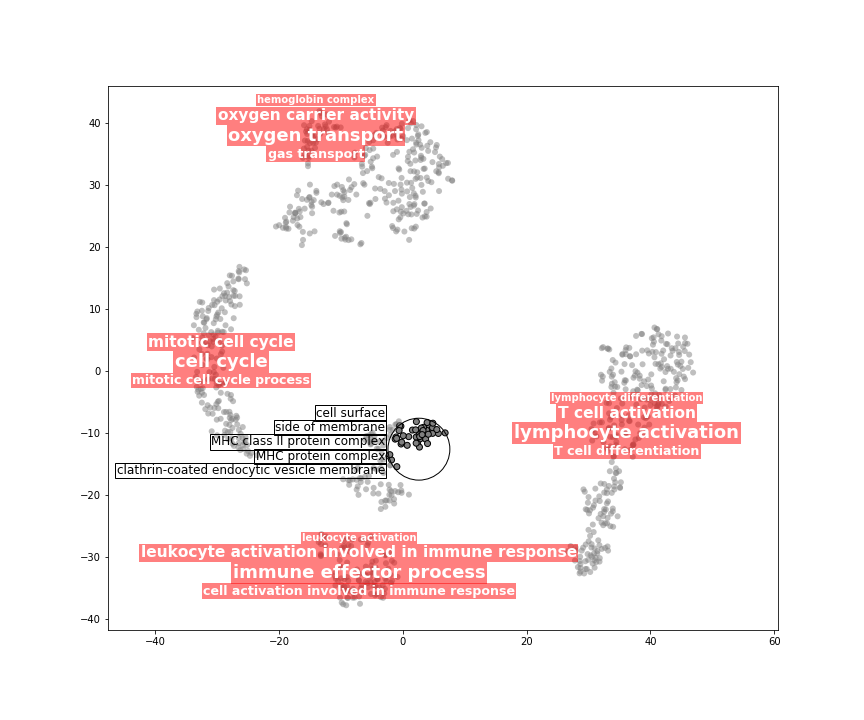

(<Figure size 864x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f90de6e65f8>)

In [9]:
%matplotlib notebook

tab_explorer.fit(df_labels, X_em, clusters, labels_dict=labels_dict)

#add classes=clusters, for coloring according to clusters
tab_explorer.plot_static()
tab_explorer.plot_interactive()